In [570]:
import numpy as np
import os
import scipy.stats
import matplotlib.pyplot as plt
import random
import time
import pickle as pkl
import scipy.stats as st
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import phase_analysis
import phase_processor
import PGanalysis

In [6]:
# save the data 
os.chdir(r'S:\All_Staff\robin\Paper\phase_coding_manuscript\final_data\fig3')
spontaneous_spiking_PCx_contra_occlusion = np.load('spontaneous_spiking_PCx_contra_occlusion.npy', allow_pickle = True)[0]
spontaneous_spiking_PCx_ipsi_occlusion = np.load('spontaneous_spiking_PCx_ipsi_occlusion.npy', allow_pickle = True)[0]

In [74]:
spontaneous_spiking_PCx_contra_occlusion.keys()

dict_keys(['all_spontaneous_tuning', 'all_stim_tuning', 'all_spontaneous_bin_rate', 'all_duration_in_resp_bin', 'all_spontaneously_locked', 'all_percent_locked_spikes', 'all_lower_CI', 'all_upper_CI', 'all_phase_hist'])

In [95]:
total_percent_spikes_exceeding_expt_contra = spontaneous_spiking_PCx_contra_occlusion['all_percent_locked_spikes']
all_percent_spikes_exceeding_cat_contra = np.array([cell for expt in total_percent_spikes_exceeding_expt_contra for cell in expt])

total_percent_spikes_exceeding_expt_ipsi = spontaneous_spiking_PCx_ipsi_occlusion['all_percent_locked_spikes']
all_percent_spikes_exceeding_cat_ipsi = np.array([cell for expt in total_percent_spikes_exceeding_expt_ipsi for cell in expt])

In [70]:
all_phase_hist_flat_contra = np.array([hist for hists in spontaneous_spiking_PCx_contra_occlusion['all_phase_hist'] for hist in hists])
all_CI_lower_flat_contra = np.array([hist for hists in spontaneous_spiking_PCx_contra_occlusion['all_lower_CI'] for hist in hists])
all_CI_upper_flat_contra = np.array([hist for hists in spontaneous_spiking_PCx_contra_occlusion['all_upper_CI'] for hist in hists])

all_phase_hist_flat_ipsi = np.array([hist for hists in spontaneous_spiking_PCx_ipsi_occlusion['all_phase_hist'] for hist in hists])
all_CI_lower_flat_ipsi = np.array([hist for hists in spontaneous_spiking_PCx_ipsi_occlusion['all_lower_CI'] for hist in hists])
all_CI_upper_flat_ipsi = np.array([hist for hists in spontaneous_spiking_PCx_ipsi_occlusion['all_upper_CI'] for hist in hists])

C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  
C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  import sys
C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: UserWarning: color is redundantly defined by the 'color' keyword argume

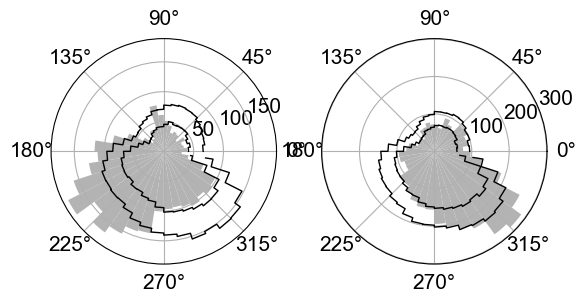

In [145]:
# Plot the median phase-locked cell 
cell = 54
bins = np.arange(0,np.radians(360)+np.radians(9), np.radians(9))
fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))
ax[0].bar(bins[:-1],all_phase_hist_flat_contra[cell,:], align = 'edge', width = np.diff(bins), color = [.7,.7,.7])
ax[0].step(bins[:-1],all_CI_lower_flat_contra[cell,:], 'k', where="post",linewidth=1, color = 'k')
ax[0].step(bins[:-1],all_CI_upper_flat_contra[cell,:], 'k',where="post",linewidth=1, color = 'k')

ax[1].bar(bins[:-1],all_phase_hist_flat_ipsi[cell,:], align = 'edge', width = np.diff(bins), color = [.7,.7,.7])
ax[1].step(bins[:-1],all_CI_lower_flat_ipsi[cell,:], 'k', where="post",linewidth=1, color = 'k')
ax[1].step(bins[:-1],all_CI_upper_flat_ipsi[cell,:], 'k',where="post",linewidth=1, color = 'k')

In [146]:
print(all_percent_spikes_exceeding_cat_contra[54])
print(all_percent_spikes_exceeding_cat_ipsi[54])

18.183526464140314
5.99382847414344


C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  """
C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  
C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  if __name__ == "__main__":
C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> col

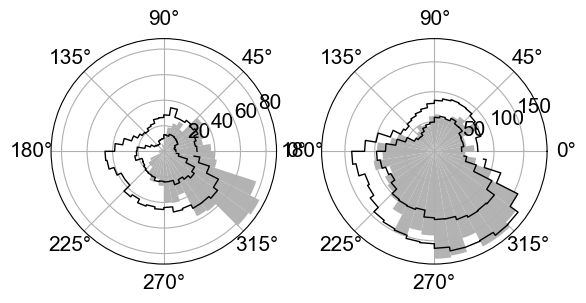

In [178]:
cell = 128
bins = np.arange(0,np.radians(360)+np.radians(9), np.radians(9))
fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))
ax[0].bar(bins[:-1],all_phase_hist_flat_contra[cell,:], align = 'edge', width = np.diff(bins), color = [.7,.7,.7])
ax[0].step(bins[:-1],all_CI_lower_flat_contra[cell,:], 'k', where="post",linewidth=1, color = 'k')
ax[0].step(bins[:-1],all_CI_upper_flat_contra[cell,:], 'k',where="post",linewidth=1, color = 'k')

ax[1].bar(bins[:-1],all_phase_hist_flat_ipsi[cell,:], align = 'edge', width = np.diff(bins), color = [.7,.7,.7])
ax[1].step(bins[:-1],all_CI_lower_flat_ipsi[cell,:], 'k', where="post",linewidth=1, color = 'k')
ax[1].step(bins[:-1],all_CI_upper_flat_ipsi[cell,:], 'k',where="post",linewidth=1, color = 'k')

In [179]:
print(all_percent_spikes_exceeding_cat_contra[128])
print(all_percent_spikes_exceeding_cat_ipsi[128])

32.80566600397615
1.882060247444866


C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  """
C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  
C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  if __name__ == "__main__":
C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> col

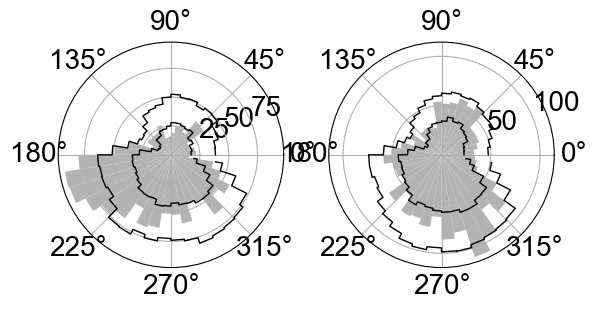

In [137]:
cell = 406
bins = np.arange(0,np.radians(360)+np.radians(9), np.radians(9))
fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))
ax[0].bar(bins[:-1],all_phase_hist_flat_contra[cell,:], align = 'edge', width = np.diff(bins), color = [.7,.7,.7])
ax[0].step(bins[:-1],all_CI_lower_flat_contra[cell,:], 'k', where="post",linewidth=1, color = 'k')
ax[0].step(bins[:-1],all_CI_upper_flat_contra[cell,:], 'k',where="post",linewidth=1, color = 'k')

ax[1].bar(bins[:-1],all_phase_hist_flat_ipsi[cell,:], align = 'edge', width = np.diff(bins), color = [.7,.7,.7])
ax[1].step(bins[:-1],all_CI_lower_flat_ipsi[cell,:], 'k', where="post",linewidth=1, color = 'k')
ax[1].step(bins[:-1],all_CI_upper_flat_ipsi[cell,:], 'k',where="post",linewidth=1, color = 'k')

C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  """
C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  
C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  if __name__ == "__main__":
C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> col

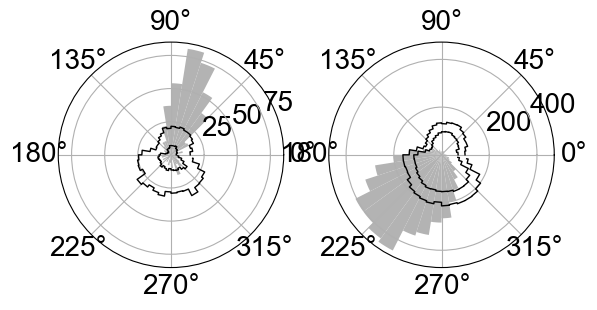

In [525]:
cell = 415
bins = np.arange(0,np.radians(360)+np.radians(9), np.radians(9))
fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))
ax[0].bar(bins[:-1],all_phase_hist_flat_contra[cell,:], align = 'edge', width = np.diff(bins), color = [.7,.7,.7])
ax[0].step(bins[:-1],all_CI_lower_flat_contra[cell,:], 'k', where="post",linewidth=1, color = 'k')
ax[0].step(bins[:-1],all_CI_upper_flat_contra[cell,:], 'k',where="post",linewidth=1, color = 'k')

ax[1].bar(bins[:-1],all_phase_hist_flat_ipsi[cell,:], align = 'edge', width = np.diff(bins), color = [.7,.7,.7])
ax[1].step(bins[:-1],all_CI_lower_flat_ipsi[cell,:], 'k', where="post",linewidth=1, color = 'k')
ax[1].step(bins[:-1],all_CI_upper_flat_ipsi[cell,:], 'k',where="post",linewidth=1, color = 'k')

In [138]:
print(all_percent_spikes_exceeding_cat_contra[406])
print(all_percent_spikes_exceeding_cat_ipsi[406])

8.699644549763034
0.8920965451964052


In [7]:
all_percent_locked_contra = []
for expt in spontaneous_spiking_PCx_contra_occlusion['all_spontaneously_locked']:
    all_percent_locked_contra.append(np.mean(expt))
    
all_percent_locked_ipsi = []
for expt in spontaneous_spiking_PCx_ipsi_occlusion['all_spontaneously_locked']:
    all_percent_locked_ipsi.append(np.mean(expt))

meta NOT subset; don't know how to subset; dropped


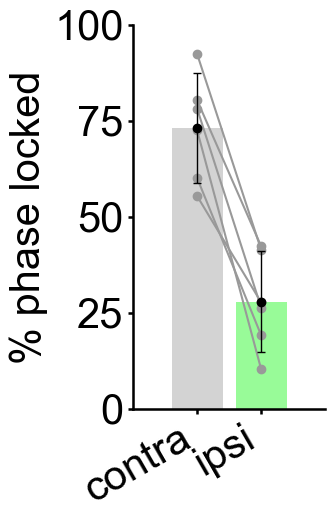

In [528]:
color = [[.4,.4,.4]]
plt.bar([0], [np.mean(all_percent_locked_contra)*100],color = 'lightgrey')
plt.bar([1], [np.mean(all_percent_locked_ipsi)*100],color = 'palegreen')

plt.ylim(0,100)
plt.xlim(-1,2)
plt.yticks([0,25,50,75,100])
plt.ylabel('% phase locked')

plt.xticks([0,1], labels = ['contra', 'ipsi'], rotation = 30, ha = 'right')

plt.plot([np.zeros(len(all_percent_locked_contra)),np.zeros(len(all_percent_locked_ipsi))+1], [np.array(all_percent_locked_contra)*100, np.array(all_percent_locked_ipsi)*100],'-o', color = [.6,.6,.6])

phase_locked_err_contra = np.mean(all_percent_locked_contra) -st.t.interval(alpha=0.95, df=len(all_percent_locked_contra)-1, loc=np.mean(all_percent_locked_contra), scale=st.sem(all_percent_locked_contra))[0]
phase_locked_err_ipsi = np.mean(all_percent_locked_ipsi) -st.t.interval(alpha=0.95, df=len(all_percent_locked_ipsi)-1, loc=np.mean(all_percent_locked_ipsi), scale=st.sem(all_percent_locked_ipsi))[0]

plt.errorbar([0,1], [np.mean(np.array(all_percent_locked_contra)*100), np.mean(np.array(all_percent_locked_ipsi)*100)], yerr = [phase_locked_err_contra*100,phase_locked_err_ipsi*100], fmt = 'o', capsize = 3, elinewidth = 1, capthick = 1, linewidth = .5, color= 'k')

PGanalysis.axis_fixer(ratio =2, size = 30)
plt.savefig(r'Z:\robin\Paper\phase_coding_manuscript\figures\fig1\fig2_final\drafts\percent_phase_locked.pdf', bbox_inches = 'tight')

In [18]:
all_percent_locked_spikes_flat_contra = np.array([spike for spikes in spontaneous_spiking_PCx_contra_occlusion['all_percent_locked_spikes'] for spike in spikes])
all_percent_locked_spikes_flat_ipsi = np.array([spike for spikes in spontaneous_spiking_PCx_ipsi_occlusion['all_percent_locked_spikes'] for spike in spikes])

meta NOT subset; don't know how to subset; dropped


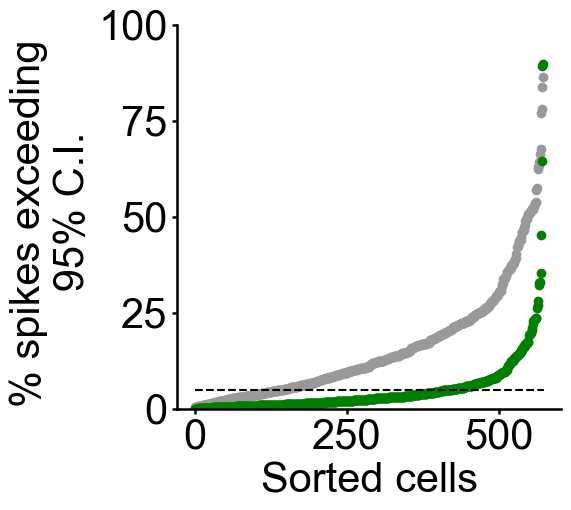

In [529]:
plt.plot(np.sort(all_percent_locked_spikes_flat_contra),'o', color = [.6,.6,.6])
plt.plot(np.sort(all_percent_locked_spikes_flat_ipsi),'go')

plt.plot([0, len(all_percent_locked_spikes_flat_contra)],[5,5],'k--')
plt.ylim(0,100)
plt.xticks([0,250,500])
plt.ylabel('% spikes exceeding \n 95% C.I.')
plt.xlabel('Sorted cells')
PGanalysis.axis_fixer(ratio = 1, size = 30)
plt.savefig(r'Z:\robin\Paper\phase_coding_manuscript\figures\fig1\fig2_final\drafts\percent_spikes_exceeding.pdf', bbox_inches = 'tight')

In [40]:
bins = np.arange(0,np.radians(360)+np.radians(9), np.radians(9))

In [41]:
all_spontaneously_locked_flat_contra = np.array([curve for expt in spontaneous_spiking_PCx_contra_occlusion['all_spontaneously_locked'] for curve in expt])
significantly_locked_contra = np.where(all_spontaneously_locked_flat_contra == 1)[0]

all_spontaneously_locked_flat_ipsi = np.array([curve for expt in spontaneous_spiking_PCx_ipsi_occlusion['all_spontaneously_locked'] for curve in expt])
significantly_locked_ipsi = np.where(all_spontaneously_locked_flat_ipsi == 1)[0]

In [42]:
all_spontaneous_bin_rate_flat_contra = np.array([curve for expt in spontaneous_spiking_PCx_contra_occlusion['all_spontaneous_bin_rate'] for curve in expt])
all_spontaneous_bin_rate_flat_norm_contra = all_spontaneous_bin_rate_flat_contra/np.max(all_spontaneous_bin_rate_flat_contra,1)[:,None]

all_spontaneous_bin_rate_flat_ipsi = np.array([curve for expt in spontaneous_spiking_PCx_ipsi_occlusion['all_spontaneous_bin_rate'] for curve in expt])
all_spontaneous_bin_rate_flat_norm_ipsi = all_spontaneous_bin_rate_flat_ipsi/np.max(all_spontaneous_bin_rate_flat_ipsi,1)[:,None]

meta NOT subset; don't know how to subset; dropped


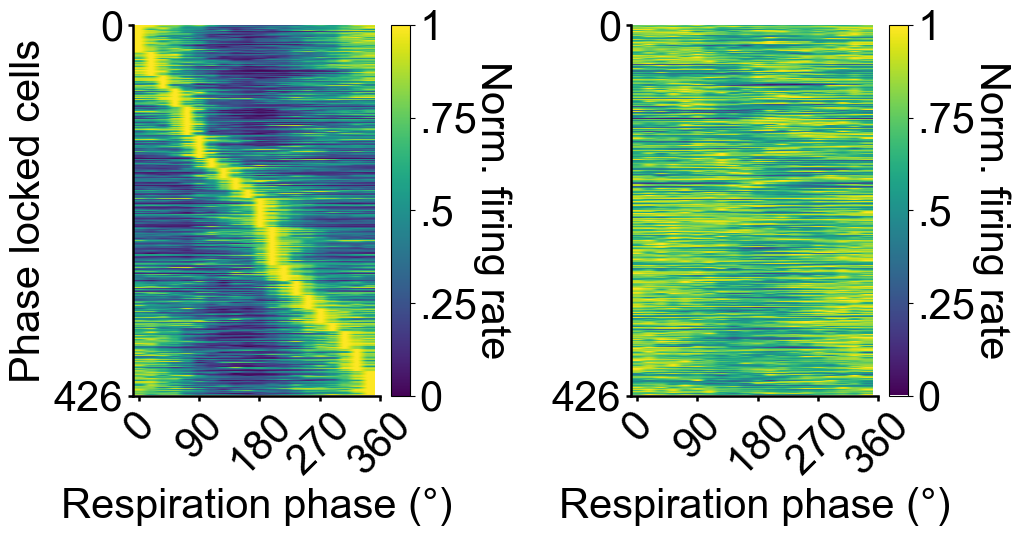

In [534]:
plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
idx = np.argsort(np.argmax(all_spontaneous_bin_rate_flat_norm_contra[significantly_locked_contra,:],1))
plt.imshow(all_spontaneous_bin_rate_flat_norm_contra[significantly_locked_contra][idx,:])
plt.xticks(np.arange(0,25,5), labels = ['0','90','180','270', '360'], rotation = 45)
plt.yticks([0, len(significantly_locked_contra)])
plt.ylabel('Phase locked cells')
plt.xlabel('Respiration phase (°)')
PGanalysis.axis_fixer(ratio = 1.5, size = 30)
ax = plt.gca()
cbar = plt.colorbar(fraction=0.067, pad=0.04)
cbar.solids.set_edgecolor("face")
cbar.ax.set_ylabel('Norm. firing rate', rotation = 270)
cbar.ax.get_yaxis().labelpad = 25
cbar.set_ticks([0,.25,.5,.75,1])
cbar.ax.set_yticklabels(['0','.25','.5','.75','1'])

plt.subplot(1,2,2)
plt.imshow(all_spontaneous_bin_rate_flat_norm_ipsi[significantly_locked_contra][idx,:])
plt.xticks(np.arange(0,25,5), labels = ['0','90','180','270', '360'], rotation = 45)
plt.yticks([0, len(significantly_locked_contra)])
plt.xlabel('Respiration phase (°)')
PGanalysis.axis_fixer(ratio = 1.5, size = 30)
ax = plt.gca()
cbar = plt.colorbar(fraction=0.067, pad=0.04)
cbar.solids.set_edgecolor("face")
cbar.ax.set_ylabel('Norm. firing rate', rotation = 270)
cbar.ax.get_yaxis().labelpad = 25
cbar.set_ticks([0,.25,.5,.75,1])
cbar.ax.set_yticklabels(['0','.25','.5','.75','1'])
plt.savefig(r'Z:\robin\Paper\phase_coding_manuscript\figures\fig1\fig2_final\drafts\phase_locking_summary.pdf', bbox_inches = 'tight')

In [504]:
# set the target directory for contralateral control naris occlusion data
expt_list_contra = os.listdir(r'Z:\robin\Paper\phase_coding_manuscript\data\fig2\phase_stats\contra')
target_dir_contra = r'Z:\robin\Paper\phase_coding_manuscript\data\fig2\phase_stats\contra'

In [505]:
# load the phase experiment data dictionaries 
all_phase_expts_contra = []
for expt in expt_list_contra:
    load_path = os.path.join(target_dir_contra, expt)
    phase_expt = np.load(load_path,allow_pickle = True)[0]
    all_phase_expts_contra.append(phase_expt)

In [506]:
# set the target directory for ipsilateral naris occlusion data
expt_list_ipsi = os.listdir(r'Z:\robin\Paper\phase_coding_manuscript\data\fig2\phase_stats\ipsi')
target_dir_ipsi = r'Z:\robin\Paper\phase_coding_manuscript\data\fig2\phase_stats\ipsi'

In [507]:
# load the phase experiment data dictionaries 
all_phase_expts_ipsi = []
for expt in expt_list_ipsi:
    load_path = os.path.join(target_dir_ipsi, expt)
    phase_expt = np.load(load_path,allow_pickle = True)[0]
    all_phase_expts_ipsi.append(phase_expt)

In [545]:
# concatenate this set of fields using the dict_key_concatenator. We will use these concatenated fields in later analyses. 
dict_keys = ['Kruskal_pval_thresh', 'Mann_Whitney_responsive_cell_bins', 'all_stim_resp_pref_phase', 'all_stim_time_to_50', 'stimulation_phase_preference']
concat_dict_contra = {}
for key in dict_keys:
    concat_dict_contra[key] = phase_analysis.dict_key_concatenator(all_phase_expts_contra, key)
    
dict_keys = ['Kruskal_pval_thresh', 'Mann_Whitney_responsive_cell_bins', 'all_stim_resp_pref_phase', 'all_stim_time_to_50', 'stimulation_phase_preference']
concat_dict_ipsi = {}
for key in dict_keys:
    concat_dict_ipsi[key] = phase_analysis.dict_key_concatenator(all_phase_expts_ipsi, key)

In [549]:
stimulation_phase_preference_contra = concat_dict_contra['stimulation_phase_preference']
all_stim_rise_times_contra = concat_dict_contra['all_stim_time_to_50']
all_stim_resp_pref_phase_contra = concat_dict_contra['all_stim_resp_pref_phase']

In [550]:
stimulation_phase_preference_ipsi = concat_dict_ipsi['stimulation_phase_preference']
all_stim_rise_times_ipsi = concat_dict_ipsi['all_stim_time_to_50']
all_stim_resp_pref_phase_ipsi = concat_dict_ipsi['all_stim_resp_pref_phase']

In [508]:
def get_tuning_stats(all_phase_expts):
    all_spot_tuned_total = []
    all_spot_tuned_responsive = []
    all_spot_activated = []
    for expt in all_phase_expts: 
        stim_activated_thresh = np.sum(expt['Mann_Whitney_responsive_cell_bins']['activated'],1)
        n_stim = expt['Kruskal_pval_thresh'].shape[0]
        for stim in range(n_stim):
            if stim>0:
                activated_count = len(np.where((stim_activated_thresh[stim,:]>0))[0])
                all_count = len(stim_activated_thresh[stim,:])
                all_spot_activated.append((activated_count/all_count)*100)
                activated_tuned_count = len(np.where((expt['Kruskal_pval_thresh'][stim,:]>0)&(stim_activated_thresh[stim,:]>0))[0])
                all_count = len((stim_activated_thresh[stim,:]>0))
                all_activated = len(np.where(stim_activated_thresh[stim,:]>0)[0])
                all_spot_tuned_total.append((activated_tuned_count/all_count)*100)
                all_spot_tuned_responsive.append((activated_tuned_count/all_activated)*100)
    return all_spot_activated, all_spot_tuned_responsive

In [509]:
all_spot_activated_contra, all_spot_tuned_responsive_contra = get_tuning_stats(all_phase_expts_contra)
all_spot_activated_ipsi, all_spot_tuned_responsive_ipsi = get_tuning_stats(all_phase_expts_ipsi)

meta NOT subset; don't know how to subset; dropped


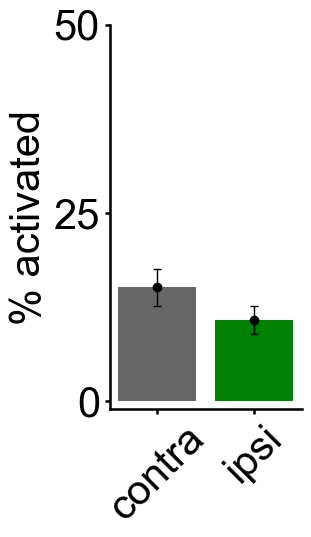

In [539]:
color = [[.4,.4,.4],'g']
plt.bar([0,1], [np.mean(all_spot_activated_contra), np.mean(all_spot_activated_ipsi)], color = color)
plt.ylim(0,50)
plt.ylim(-1,50)
plt.yticks([0,25,50])
plt.ylabel('% activated')
CI_contra = np.mean(all_spot_activated_contra) -st.t.interval(alpha=0.95, df=len(all_spot_activated_contra)-1, loc=np.mean(all_spot_activated_contra), scale=st.sem(all_spot_activated_contra))[0]
CI_ipsi = np.mean(all_spot_activated_ipsi) -st.t.interval(alpha=0.95, df=len(all_spot_activated_ipsi)-1, loc=np.mean(all_spot_activated_ipsi), scale=st.sem(all_spot_activated_ipsi))[0]
plt.xticks([0,1], labels = ['contra', 'ipsi'], rotation = 45)
plt.errorbar([0,1], [np.mean(all_spot_activated_contra), np.mean(all_spot_activated_ipsi)], yerr = [CI_contra, CI_ipsi], fmt = 'o', capsize = 3, elinewidth = 1, capthick = 1, linewidth = .5, color= 'k')
PGanalysis.axis_fixer(ratio = 2, size = 30)
plt.savefig(r'Z:\robin\Paper\phase_coding_manuscript\figures\fig1\fig2_final\drafts\percent_activated.pdf', bbox_inches = 'tight')

In [514]:
print('Mean percentage of cells that are activated in contra condition = ' + str(np.mean(all_spot_activated_contra)))
CI = st.t.interval(alpha=0.95, df=len(all_spot_activated_contra)-1, loc=np.mean(all_spot_activated_contra), scale=st.sem(all_spot_activated_contra)) 
print('95% confidence interval = ' + str(np.mean(all_spot_activated_contra) - CI[0]))

Mean percentage of cells that are activated in contra condition = 15.11377894651507
95% confidence interval = 2.4995249891923788


In [515]:
print('Mean percentage of cells that are activated in ipsi condition = ' + str(np.mean(all_spot_activated_ipsi)))
CI = st.t.interval(alpha=0.95, df=len(all_spot_activated_ipsi)-1, loc=np.mean(all_spot_activated_ipsi), scale=st.sem(all_spot_activated_ipsi)) 
print('95% confidence interval = ' + str(np.mean(all_spot_activated_ipsi) - CI[0]))

Mean percentage of cells that are activated in ipsi condition = 10.77824951638745
95% confidence interval = 1.8547424816400344


In [516]:
scipy.stats.ttest_rel(all_spot_activated_contra, all_spot_activated_ipsi)

Ttest_relResult(statistic=4.834738742969322, pvalue=4.0151257962564716e-05)

meta NOT subset; don't know how to subset; dropped


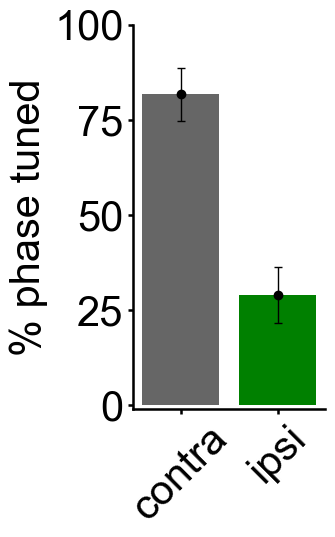

In [540]:
color = [[.4,.4,.4],'g']
plt.bar([0,1], [np.mean(all_spot_tuned_responsive_contra), np.mean(all_spot_tuned_responsive_ipsi)], color = color)
plt.ylim(-1,100)
plt.yticks([0,25,50,75,100])
plt.ylabel('% phase tuned')
CI_contra = np.mean(all_spot_tuned_responsive_contra) -st.t.interval(alpha=0.95, df=len(all_spot_tuned_responsive_contra)-1, loc=np.mean(all_spot_tuned_responsive_contra), scale=st.sem(all_spot_tuned_responsive_contra))[0]
CI_ipsi = np.mean(all_spot_tuned_responsive_ipsi) -st.t.interval(alpha=0.95, df=len(all_spot_tuned_responsive_ipsi)-1, loc=np.mean(all_spot_tuned_responsive_ipsi), scale=st.sem(all_spot_tuned_responsive_ipsi))[0]
plt.xticks([0,1], labels = ['contra', 'ipsi'], rotation = 45)
plt.errorbar([0,1], [np.mean(all_spot_tuned_responsive_contra), np.mean(all_spot_tuned_responsive_ipsi)], yerr = [CI_contra, CI_ipsi], fmt = 'o', capsize = 3, elinewidth = 1, capthick = 1, linewidth = .5, color= 'k')
PGanalysis.axis_fixer(ratio = 2, size = 20)
plt.savefig(r'Z:\robin\Paper\phase_coding_manuscript\figures\fig1\fig2_final\drafts\percent_tuned.pdf', bbox_inches = 'tight')

In [518]:
print('Mean percentage of responsive cells that are tuned in contra condition = ' + str(np.mean(all_spot_tuned_responsive_contra)))
CI = st.t.interval(alpha=0.95, df=len(all_spot_tuned_responsive_contra)-1, loc=np.mean(all_spot_tuned_responsive_contra), scale=st.sem(all_spot_tuned_responsive_contra)) 
print('95% confidence interval = ' + str(np.mean(all_spot_tuned_responsive_contra) - CI[0]))

Mean percentage of responsive cells that are tuned in contra condition = 81.663888158625
95% confidence interval = 7.003243358647538


In [519]:
print('Mean percentage of responsive cells that are tuned in ipsi condition = ' + str(np.mean(all_spot_tuned_responsive_ipsi)))
CI = st.t.interval(alpha=0.95, df=len(all_spot_tuned_responsive_ipsi)-1, loc=np.mean(all_spot_tuned_responsive_ipsi), scale=st.sem(all_spot_tuned_responsive_ipsi)) 
print('95% confidence interval = ' + str(np.mean(all_spot_tuned_responsive_ipsi) - CI[0]))

Mean percentage of responsive cells that are tuned in ipsi condition = 28.881481822271294
95% confidence interval = 7.411884142418234


In [520]:
scipy.stats.ttest_rel(all_spot_tuned_responsive_contra, all_spot_tuned_responsive_ipsi)

Ttest_relResult(statistic=13.374982211148701, pvalue=6.216654487719527e-14)

In [553]:
# get the tuning curves for all significantly activating spots for all cells 
n_cells = all_phase_tuning_concat_contra.shape[2]
all_responsive_spot_tuning_curves_contra = []
all_responsive_spot_tuning_curves_ipsi = []
for cell in range(n_cells):
    # pull out spots that significantly activate the cell (a non-nan stimulation phase preference)
    responsive_spots = np.where(~np.isnan(stimulation_phase_preference_contra[:,cell]))[0]
    if len(responsive_spots)>0:
        responsive_spot_tuning_curves_contra = all_phase_tuning_concat_contra[responsive_spots,:,cell]
        all_responsive_spot_tuning_curves_contra.append(responsive_spot_tuning_curves_contra)
        responsive_spot_tuning_curves_ipsi = all_phase_tuning_concat_ipsi[responsive_spots,:,cell]
        all_responsive_spot_tuning_curves_ipsi.append(responsive_spot_tuning_curves_ipsi)

In [554]:
# flatten the list so we have an n_cell_spot_pairs x n_bins matrix
all_responsive_spot_tuning_curves_flat_contra = np.array([spot for cell in all_responsive_spot_tuning_curves_contra for spot in cell])
# normalize the tuning curves
all_stim_tuning_ravel_norm_contra = all_responsive_spot_tuning_curves_flat_contra/np.max(all_responsive_spot_tuning_curves_flat_contra,1)[:,None]

# flatten the list so we have an n_cell_spot_pairs x n_bins matrix
all_responsive_spot_tuning_curves_flat_ipsi = np.array([spot for cell in all_responsive_spot_tuning_curves_ipsi for spot in cell])
# normalize the tuning curves
all_stim_tuning_ravel_norm_ipsi = all_responsive_spot_tuning_curves_flat_ipsi/np.max(all_responsive_spot_tuning_curves_flat_ipsi,1)[:,None]

meta NOT subset; don't know how to subset; dropped


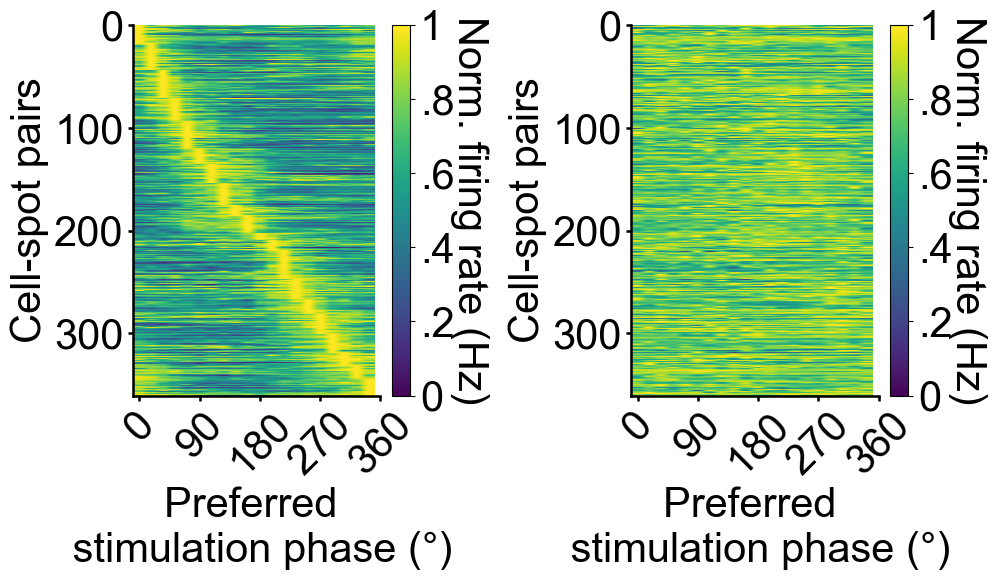

In [559]:
plt.figure(figsize = (10,10))

plt.subplot(1,2,1)
idx = np.argsort(np.argmax(all_stim_tuning_ravel_norm_contra,1))
fig = plt.imshow(all_stim_tuning_ravel_norm_contra[idx],aspect = 'auto')
plt.xticks(np.arange(0,25,5), labels = [str(x) for x in np.arange(0,450,90)], rotation = 45)
plt.clim(0,1)
plt.xlabel('Preferred \n stimulation phase (°)')
plt.ylabel('Cell-spot pairs')
ax = plt.gca()
cbar = plt.colorbar(fraction=0.067, pad=0.04)
cbar.solids.set_edgecolor("face")
cbar.ax.set_yticks([0,.2,.4,.6,.8,1])
cbar.ax.set_yticklabels(['0', '.2','.4','.6','.8','1'])
cbar.ax.set_ylabel('Norm. firing rate (Hz)', rotation = 270)
cbar.ax.get_yaxis().labelpad = 25
PGanalysis.axis_fixer(ratio = 1.5, size = 30)

plt.subplot(1,2,2)
fig = plt.imshow(all_stim_tuning_ravel_norm_ipsi[idx],aspect = 'auto')
plt.xticks(np.arange(0,25,5), labels = [str(x) for x in np.arange(0,450,90)], rotation = 45)
plt.clim(0,1)
plt.xlabel('Preferred \n stimulation phase (°)')
plt.ylabel('Cell-spot pairs')
ax = plt.gca()
cbar = plt.colorbar(fraction=0.067, pad=0.04)
cbar.solids.set_edgecolor("face")
cbar.ax.set_yticks([0,.2,.4,.6,.8,1])
cbar.ax.set_yticklabels(['0', '.2','.4','.6','.8','1'])
cbar.ax.set_ylabel('Norm. firing rate (Hz)', rotation = 270)
cbar.ax.get_yaxis().labelpad = 25
PGanalysis.axis_fixer(ratio = 1.5, size = 30)
plt.savefig(r'Z:\robin\Paper\phase_coding_manuscript\figures\fig1\fig2_final\drafts\phase_tuning_summary.pdf', bbox_inches = 'tight')

In [ ]:
# define data paths
raster_array_path  = r'Z:\robin\Paper\phase_coding_manuscript\data\fig1\raster_data\230407.npy'
psth_path = r'C:\Users\rmb55\most_updated_pattern_stim\pattern_stim_analysis\paper\data\230407.npy'
mtrigger_path =  r'Z:\robin\expt_sets\pattern_stim\recordings\230407\2023-04-07_14-57-28\experiment1\recording1\continuous\Rhythm_FPGA-100.0\230407_mtrigger.dat'
expt_metadata_path = r'Z:\robin\expt_sets\pattern_stim\metadata\230407\P162_2023_4_7_17253_fullexpt'
hilbert_transformed_resp_path = r'Z:\robin\Paper\phase_coding_manuscript\data\fig1\resp_data\230407.npy'

In [222]:
# Load the tuning curves for all cell-stim pairs
expt_list_tuning = os.listdir(r'Z:\robin\Paper\phase_coding_manuscript\data\fig2\phase_tuning\contra')
target_dir_tuning = r'Z:\robin\Paper\phase_coding_manuscript\data\fig2\phase_tuning\contra'

all_phase_tuning = []
for expt in expt_list_tuning:
    load_path = os.path.join(target_dir_tuning, expt)
    phase_tuning = np.load(load_path,allow_pickle = True)[0]
    all_phase_tuning.append(phase_tuning)

# concatenate tuning curves for all cells across experiments 
all_phase_tuning_concat_contra = all_phase_tuning[0]
for tun in all_phase_tuning[1:]:
    all_phase_tuning_concat_contra = np.concatenate((all_phase_tuning_concat_contra, tun), axis = 2)

In [228]:
# Load the tuning curves for all cell-stim pairs
expt_list_tuning = os.listdir(r'Z:\robin\Paper\phase_coding_manuscript\data\fig2\phase_tuning\ipsi')
target_dir_tuning = r'Z:\robin\Paper\phase_coding_manuscript\data\fig2\phase_tuning\ipsi'

all_phase_tuning = []
for expt in expt_list_tuning:
    load_path = os.path.join(target_dir_tuning, expt)
    phase_tuning = np.load(load_path,allow_pickle = True)[0]
    all_phase_tuning.append(phase_tuning)

# concatenate tuning curves for all cells across experiments 
all_phase_tuning_concat_ipsi = all_phase_tuning[0]
for tun in all_phase_tuning[1:]:
    all_phase_tuning_concat_ipsi = np.concatenate((all_phase_tuning_concat_ipsi, tun), axis = 2)

In [229]:
def plot_contra_ipsi_spot_tuning_curves(tuning_contra, tuning_ipsi, cell, ylim = 30):
    '''
    This function plots the phase tuning curves for each stimulated spot.
    
    parameters
    ------
    cell: index of the cell to plot
        
    outputs
    -------
    plot of tuning curves by respiration phase for each stimulation spot.'''
    phases = np.arange(0,360,18)
    plt.figure(figsize = (10,5))
    for stim in range(0,6):
        plt.subplot(1,6,stim+1)
        plt.plot(phases,tuning_contra[stim,:,cell],'k', linewidth = 1)
        plt.plot(phases,tuning_ipsi[stim,:,cell],'g', linewidth = 1)
        plt.ylim(0,ylim)
        plt.xlim(0,360)
        plt.xticks([0,180,360])
        plt.yticks([0,ylim/2,ylim])
        plt.title('spot ' + str(stim))
        plt.xlabel('phase')
        if (stim == 0):
            plt.ylabel('FR (Hz)')
            plt.title('blank')
        PGanalysis.axis_fixer(ratio = 1, size = 15)

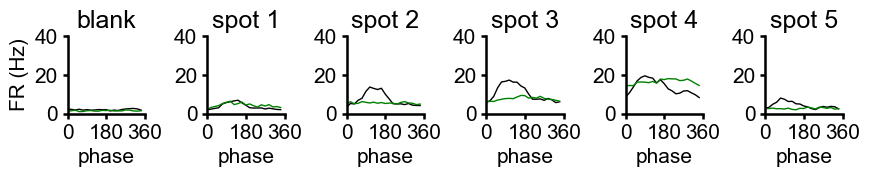

In [230]:
cell = 54
plot_contra_ipsi_spot_tuning_curves(all_phase_tuning_concat_contra, all_phase_tuning_concat_ipsi, cell, ylim = 40)

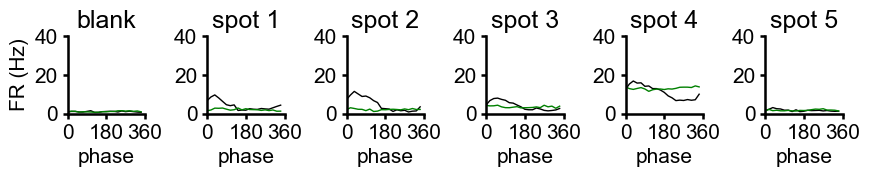

In [257]:
#107
cell = 114
plot_contra_ipsi_spot_tuning_curves(all_phase_tuning_concat_contra, all_phase_tuning_concat_ipsi, cell, ylim = 40)

In [258]:
print(all_percent_spikes_exceeding_cat_contra[114])
print(all_percent_spikes_exceeding_cat_ipsi[114])

18.412867996201335
5.99817850637523


C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  """
C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  
C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  if __name__ == "__main__":
C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> col

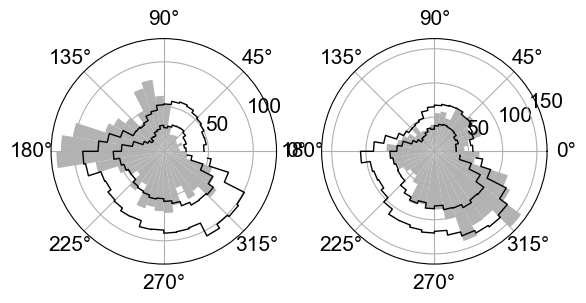

In [259]:
cell = 114
bins = np.arange(0,np.radians(360)+np.radians(9), np.radians(9))
fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))
ax[0].bar(bins[:-1],all_phase_hist_flat_contra[cell,:], align = 'edge', width = np.diff(bins), color = [.7,.7,.7])
ax[0].step(bins[:-1],all_CI_lower_flat_contra[cell,:], 'k', where="post",linewidth=1, color = 'k')
ax[0].step(bins[:-1],all_CI_upper_flat_contra[cell,:], 'k',where="post",linewidth=1, color = 'k')

ax[1].bar(bins[:-1],all_phase_hist_flat_ipsi[cell,:], align = 'edge', width = np.diff(bins), color = [.7,.7,.7])
ax[1].step(bins[:-1],all_CI_lower_flat_ipsi[cell,:], 'k', where="post",linewidth=1, color = 'k')
ax[1].step(bins[:-1],all_CI_upper_flat_ipsi[cell,:], 'k',where="post",linewidth=1, color = 'k')

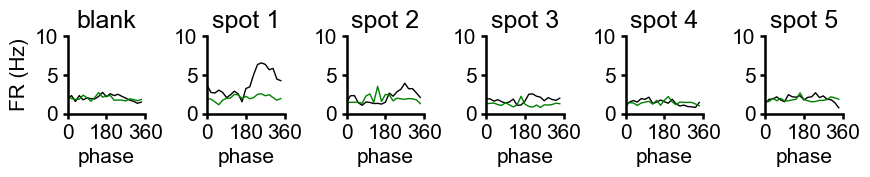

In [291]:
#107
cell = 428
plot_contra_ipsi_spot_tuning_curves(all_phase_tuning_concat_contra, all_phase_tuning_concat_ipsi, cell, ylim =10)

C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  """
C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  
C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  if __name__ == "__main__":
C:\Users\rmb55\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> col

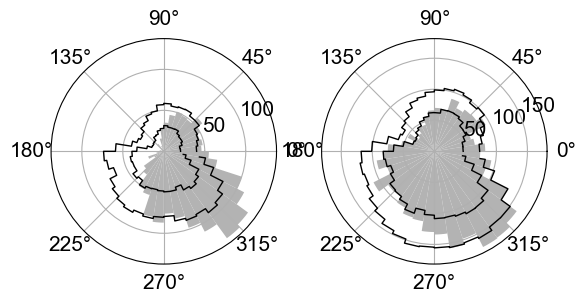

In [292]:
cell = 428
bins = np.arange(0,np.radians(360)+np.radians(9), np.radians(9))
fig, ax = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))
ax[0].bar(bins[:-1],all_phase_hist_flat_contra[cell,:], align = 'edge', width = np.diff(bins), color = [.7,.7,.7])
ax[0].step(bins[:-1],all_CI_lower_flat_contra[cell,:], 'k', where="post",linewidth=1, color = 'k')
ax[0].step(bins[:-1],all_CI_upper_flat_contra[cell,:], 'k',where="post",linewidth=1, color = 'k')

ax[1].bar(bins[:-1],all_phase_hist_flat_ipsi[cell,:], align = 'edge', width = np.diff(bins), color = [.7,.7,.7])
ax[1].step(bins[:-1],all_CI_lower_flat_ipsi[cell,:], 'k', where="post",linewidth=1, color = 'k')
ax[1].step(bins[:-1],all_CI_upper_flat_ipsi[cell,:], 'k',where="post",linewidth=1, color = 'k')

In [293]:
print(all_percent_spikes_exceeding_cat_contra[428])
print(all_percent_spikes_exceeding_cat_ipsi[428])

26.56743940990517
2.5608407079646054


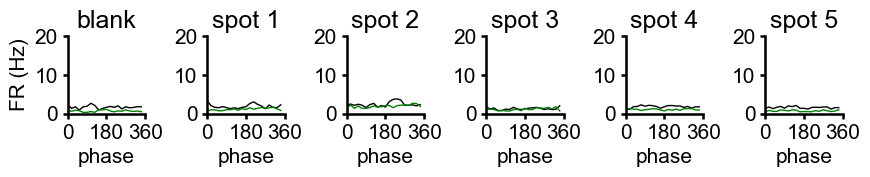

In [501]:
#107
cell = 485
plot_contra_ipsi_spot_tuning_curves(all_phase_tuning_concat_contra, all_phase_tuning_concat_ipsi, cell, ylim =20)

meta NOT subset; don't know how to subset; dropped


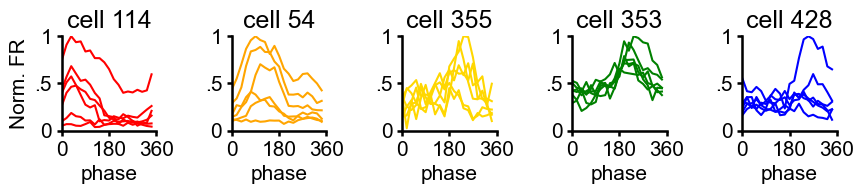

In [536]:
plt.figure(figsize = (10,30))
cells = [114,54,355,353,428]
colors = ['red', 'orange','gold','green','blue']
phases = np.arange(0,360,18)
for cell_n, cell in enumerate(cells):
    plt.subplot(1,5,cell_n+1)
    for stim in range(all_phase_tuning_concat.shape[0]):
        plt.plot(phases,all_phase_tuning_concat_contra[stim,:,cell]/np.max(all_phase_tuning_concat_contra[:,:,cell]),color = colors[cell_n])
    #plt.plot(phases,tuning[0,:,cell]/np.max(tuning[:,:,cell]),color = 'k')
    plt.ylim(0,1)
    plt.xlim(0,360)
    plt.xticks([0,180,360])
    plt.yticks([0,.5,1], labels = ['0','.5','1'])
    plt.title('cell ' + str(cell))
    plt.xlabel('phase')
    if (cell_n == 0) or (cell_n == 5):
        plt.ylabel('Norm. FR')
    PGanalysis.axis_fixer(ratio = 1, size = 15)
plt.savefig(r'Z:\robin\Paper\phase_coding_manuscript\figures\fig1\fig2_final\drafts\example_cell_contra_tuning.pdf', bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


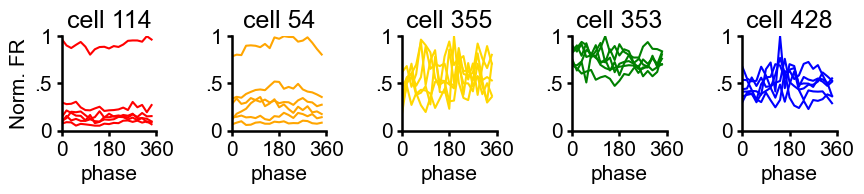

In [537]:
plt.figure(figsize = (10,30))
cells = [114,54,355,353,428]
colors = ['red', 'orange','gold','green','blue']
phases = np.arange(0,360,18)
for cell_n, cell in enumerate(cells):
    plt.subplot(1,5,cell_n+1)
    for stim in range(all_phase_tuning_concat.shape[0]):
        plt.plot(phases,all_phase_tuning_concat_ipsi[stim,:,cell]/np.max(all_phase_tuning_concat_ipsi[:,:,cell]),color = colors[cell_n], alpha = 1)
    #plt.plot(phases,tuning[0,:,cell]/np.max(tuning[:,:,cell]),color = 'k')
    plt.ylim(0,1)
    plt.xlim(0,360)
    plt.xticks([0,180,360])
    plt.yticks([0,.5,1], labels = ['0','.5','1'])
    plt.title('cell ' + str(cell))
    plt.xlabel('phase')
    if (cell_n == 0) or (cell_n == 5):
        plt.ylabel('Norm. FR')
    PGanalysis.axis_fixer(ratio = 1, size = 15)
plt.savefig(r'Z:\robin\Paper\phase_coding_manuscript\figures\fig1\fig2_final\drafts\example_cell_ipsi_tuning.pdf', bbox_inches = 'tight')

In [502]:
# get the tuning curves for all significantly activating spots for all cells 
n_cells = all_phase_tuning_concat.shape[2]
all_responsive_spot_tuning_curves = []
for cell in range(n_cells):
    # pull out spots that significantly activate the cell (a non-nan stimulation phase preference)
    responsive_spots = np.where(~np.isnan(stimulation_phase_preference[:,cell]))[0]
    if len(responsive_spots)>0:
        responsive_spot_tuning_curves = all_phase_tuning_concat[responsive_spots,:,cell]
        all_responsive_spot_tuning_curves.append(responsive_spot_tuning_curves)

### Phase decoding

In [601]:
# set the target directory for trial-by-trial spike counts over the 300ms response period for each experiment
expt_list = os.listdir(r'Z:\robin\Paper\phase_coding_manuscript\data\fig2\population_analysis_data\contra')
target_dir = r'Z:\robin\Paper\phase_coding_manuscript\data\fig2\population_analysis_data\contra'

In [602]:
# bin the spike counts by the phase of OB stimulation. For each phase bin, we will use the first 15 trials of stimulation. 
all_phase_expts = []
for expt in expt_list:
    load_path = os.path.join(target_dir, expt)
    phase_expt = np.load(load_path,allow_pickle = True)[0]
    binned_spike_counts = phase_analysis.bin_spike_counts_by_phase(phase_expt['trial_type_spike_counts'], phase_expt['bin_indices_all'], max_trial = 15)
    all_phase_expts.append(np.array(binned_spike_counts))

In [603]:
# set some useful parameters
n_spots = all_phase_expts[0].shape[0] # 11 spots (10 and 1 blank)
n_bins = all_phase_expts[0].shape[1] # 20 bins
n_trials = 15 # hard-coded, we will analyze the first 15 trials of each stimulation-phase for each spot

In [604]:
# concatenate cells across experiments for all spots (excluding the blank)
all_phase_expts_spot_cat = all_phase_expts[0][1:,:,:,:]
for expt in all_phase_expts[1:]:
    all_phase_expts_spot_cat = np.concatenate((all_phase_expts_spot_cat, expt[1:,:,:,:]), axis = 2)

In [605]:
# rearrange the axes so we end up with an n_bins x (n_spots x n_trials) x n_cells array. This gives us 150 trials per spot bin. 
all_phase_expts_spot_cat_arranged = np.moveaxis(all_phase_expts_spot_cat, (2,3), (3,2))
all_phase_expts_spot_cat_arranged = np.moveaxis(all_phase_expts_spot_cat_arranged, (0,1), (1,0))
all_phase_expts_spot_cat_reshaped = np.reshape(all_phase_expts_spot_cat_arranged,
                                               (all_phase_expts_spot_cat_arranged.shape[0],all_phase_expts_spot_cat_arranged.shape[1]*all_phase_expts_spot_cat_arranged.shape[2],all_phase_expts_spot_cat_arranged.shape[3]))

In [606]:
# reshape the training data in n_instances(150*20) x n_features(519). create a labels array with 150 trials per phase bin. 
train_data = np.reshape(all_phase_expts_spot_cat_reshaped, (all_phase_expts_spot_cat_reshaped.shape[0]*all_phase_expts_spot_cat_reshaped.shape[1],all_phase_expts_spot_cat_reshaped.shape[2]))
labels = np.repeat(np.arange(all_phase_expts_spot_cat_reshaped.shape[0]),all_phase_expts_spot_cat_reshaped.shape[1])

In [607]:
# Now, let's train an svm classifier using this data 
X_train = train_data
y_train = labels 
svm_clf = SVC(kernel = 'linear')

# train and test the classifier using 5-fold cross-validation
y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv = 5)
conf_mx = confusion_matrix(y_train, y_train_pred)

# to get the % accuracy, divide the matrix by the number of trials 
row_sums = conf_mx.sum(axis = 1, keepdims = True)
conf_mx_contra = conf_mx/row_sums

meta NOT subset; don't know how to subset; dropped


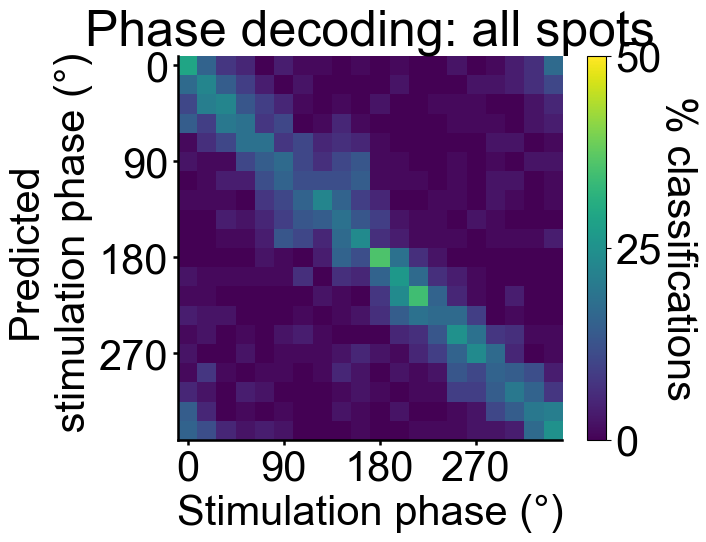

In [630]:
# plot the phase classification accuracy for spot stimulation
plt.imshow(conf_mx_contra)
plt.title('Phase decoding: all spots')
plt.xticks(np.arange(0,20,5), labels = [str(x) for x in np.arange(0,360,90)])
plt.yticks(np.arange(0,20,5), labels = [str(x) for x in np.arange(0,360,90)])
plt.ylabel('Predicted \n stimulation phase (°)')
plt.xlabel('Stimulation phase (°)')

plt.clim(0,.5)
ax = plt.gca()
cbar = plt.colorbar(ticks = [0,.25,.5])
cbar.solids.set_edgecolor("face")
cbar.ax.set_ylabel('% classifications', rotation = 270)
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_yticklabels(['0','25','50'])
PGanalysis.axis_fixer(size = 30)
plt.savefig(r'Z:\robin\Paper\phase_coding_manuscript\figures\fig1\fig2_final\drafts\contra_phase_decoding.pdf', bbox_inches = 'tight')

In [631]:
# set the target directory for trial-by-trial spike counts over the 300ms response period for each experiment
expt_list = os.listdir(r'Z:\robin\Paper\phase_coding_manuscript\data\fig2\population_analysis_data\ipsi')
target_dir = r'Z:\robin\Paper\phase_coding_manuscript\data\fig2\population_analysis_data\ipsi'

In [632]:
# bin the spike counts by the phase of OB stimulation. For each phase bin, we will use the first 15 trials of stimulation. 
all_phase_expts = []
for expt in expt_list:
    load_path = os.path.join(target_dir, expt)
    phase_expt = np.load(load_path,allow_pickle = True)[0]
    binned_spike_counts = phase_analysis.bin_spike_counts_by_phase(phase_expt['trial_type_spike_counts'], phase_expt['bin_indices_all'], max_trial = 15)
    all_phase_expts.append(np.array(binned_spike_counts))

In [633]:
# set some useful parameters
n_spots = all_phase_expts[0].shape[0] # 11 spots (10 and 1 blank)
n_bins = all_phase_expts[0].shape[1] # 20 bins
n_trials = 15 # hard-coded, we will analyze the first 15 trials of each stimulation-phase for each spot

In [634]:
# concatenate cells across experiments for all spots (excluding the blank)
all_phase_expts_spot_cat = all_phase_expts[0][1:,:,:,:]
for expt in all_phase_expts[1:]:
    all_phase_expts_spot_cat = np.concatenate((all_phase_expts_spot_cat, expt[1:,:,:,:]), axis = 2)

In [635]:
# rearrange the axes so we end up with an n_bins x (n_spots x n_trials) x n_cells array. This gives us 150 trials per spot bin. 
all_phase_expts_spot_cat_arranged = np.moveaxis(all_phase_expts_spot_cat, (2,3), (3,2))
all_phase_expts_spot_cat_arranged = np.moveaxis(all_phase_expts_spot_cat_arranged, (0,1), (1,0))
all_phase_expts_spot_cat_reshaped = np.reshape(all_phase_expts_spot_cat_arranged,
                                               (all_phase_expts_spot_cat_arranged.shape[0],all_phase_expts_spot_cat_arranged.shape[1]*all_phase_expts_spot_cat_arranged.shape[2],all_phase_expts_spot_cat_arranged.shape[3]))

In [636]:
# reshape the training data in n_instances(150*20) x n_features(519). create a labels array with 150 trials per phase bin. 
train_data = np.reshape(all_phase_expts_spot_cat_reshaped, (all_phase_expts_spot_cat_reshaped.shape[0]*all_phase_expts_spot_cat_reshaped.shape[1],all_phase_expts_spot_cat_reshaped.shape[2]))
labels = np.repeat(np.arange(all_phase_expts_spot_cat_reshaped.shape[0]),all_phase_expts_spot_cat_reshaped.shape[1])

In [637]:
# Now, let's train an svm classifier using this data 
X_train = train_data
y_train = labels 
svm_clf = SVC(kernel = 'linear')

# train and test the classifier using 5-fold cross-validation
y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv = 5)
conf_mx = confusion_matrix(y_train, y_train_pred)

# to get the % accuracy, divide the matrix by the number of trials 
row_sums = conf_mx.sum(axis = 1, keepdims = True)
conf_mx_ipsi = conf_mx/row_sums

meta NOT subset; don't know how to subset; dropped


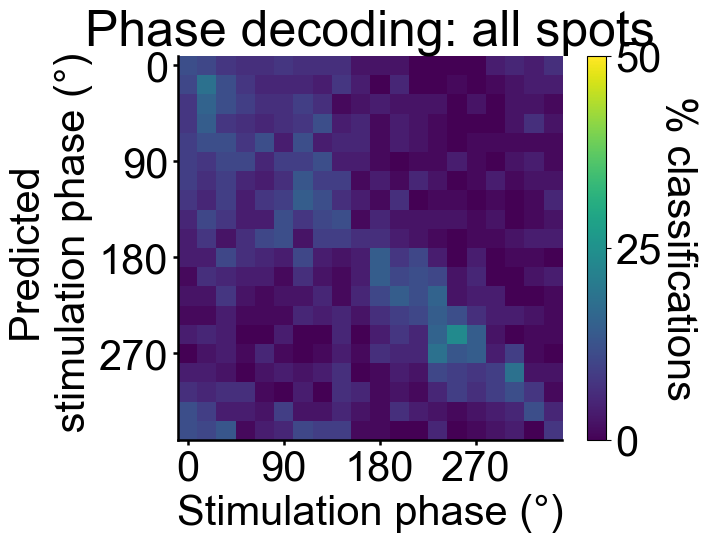

In [641]:
# plot the phase classification accuracy for spot stimulation
plt.imshow(conf_mx_ipsi)
plt.title('Phase decoding: all spots')
plt.xticks(np.arange(0,20,5), labels = [str(x) for x in np.arange(0,360,90)])
plt.yticks(np.arange(0,20,5), labels = [str(x) for x in np.arange(0,360,90)])
plt.ylabel('Predicted \n stimulation phase (°)')
plt.xlabel('Stimulation phase (°)')

plt.clim(0,.5)
ax = plt.gca()
cbar = plt.colorbar(ticks = [0,.25,.5])
cbar.solids.set_edgecolor("face")
cbar.ax.set_ylabel('% classifications', rotation = 270)
cbar.ax.get_yaxis().labelpad = 25
cbar.ax.set_yticklabels(['0','25','50'])
PGanalysis.axis_fixer(size = 20)
plt.savefig(r'Z:\robin\Paper\phase_coding_manuscript\figures\fig1\fig2_final\drafts\ipsi_phase_decoding.pdf', bbox_inches = 'tight')

In [623]:
# Here, we will shift each row of the matrix so that the correct bin is centered.
# Do this for phase decoding and blank analyses
n_rolls = int(conf_mx_contra.shape[0]/2)
t = np.arange((n_rolls),(n_rolls)*-1,-1)
rolled_mat_spots_contra = np.zeros_like(conf_mx_contra)
rolled_mat_spots_ipsi = np.zeros_like(conf_mx_ipsi)
for roll_n, roll in enumerate(t):
    rolled_mat_spots_contra[roll_n,:] = np.roll(conf_mx_contra[roll_n,:],roll)
    rolled_mat_spots_ipsi[roll_n,:] = np.roll(conf_mx_ipsi[roll_n,:],roll)

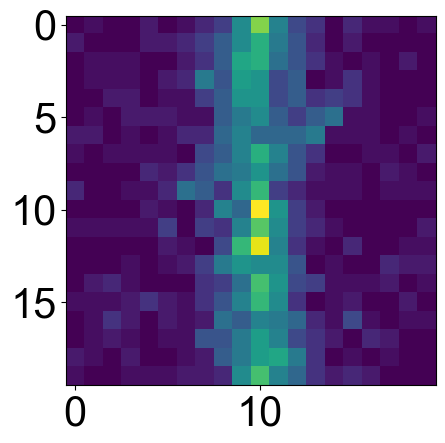

In [624]:
plt.imshow(rolled_mat_spots_contra)

meta NOT subset; don't know how to subset; dropped


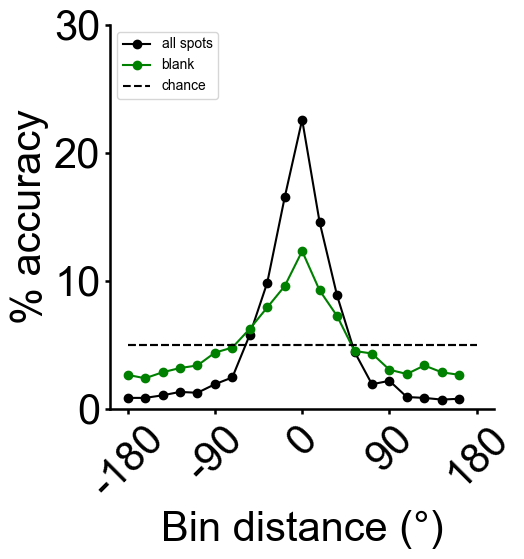

In [648]:
# plot classifier accuracy as a function of bin distance 
plt.plot(np.mean(rolled_mat_spots_contra,0),'-ko', label = 'all spots')
plt.plot(np.mean(rolled_mat_spots_ipsi,0),'-go', label = 'blank')
plt.ylim(0,.3)
plt.ylabel('% accuracy')
plt.yticks([0,.1,.2,.3], labels = ['0','10','20','30'])
plt.xticks(np.arange(0,25,5), labels = [-180,-90,0,90,180])
plt.xlabel('Bin distance (°)')
PGanalysis.axis_fixer(ratio = 1, size = 30)

plt.ylim(0,.3)
plt.plot([0,20],[1/20, 1/20], 'k--')
plt.ylabel('% accuracy')
plt.yticks([0,.1,.2,.3], labels = ['0','10','20','30'])
plt.xticks(np.arange(0,25,5), labels = [-180,-90,0,90,180], rotation = 45)
plt.xlabel('Bin distance (°)')
plt.plot([0,20],[1/20, 1/20], 'k--', label = 'chance')
plt.legend(loc = 'upper left', fontsize = 10)
PGanalysis.axis_fixer(ratio = 1, size = 30)
plt.savefig(r'Z:\robin\Paper\phase_coding_manuscript\figures\fig1\fig2_final\drafts\decoding_performance_summary.pdf', bbox_inches = 'tight')

In [683]:
raster_array_path_contra  = r'Z:\robin\Paper\phase_coding_manuscript\data\fig2\raster_data\contra\230421.npy'
raster_array_path_ipsi  = r'Z:\robin\Paper\phase_coding_manuscript\data\fig2\raster_data\ipsi\230421.npy'
hilbert_transformed_resp_path = r'Z:\robin\Paper\phase_coding_manuscript\data\fig2\resp_data\230421.npy'
mtrigger_path = r'Z:\robin\expt_sets\pattern_stim\recordings\230421\2023-04-21_12-45-55\experiment1\recording1\continuous\Rhythm_FPGA-100.0\230421_mtrigger.dat'
expt_metadata_path_contra = r'Z:\robin\expt_sets\pattern_stim\metadata\230421\P163_2023_4_21_135647_fullexpt'
expt_metadata_path_ipsi = r'Z:\robin\expt_sets\pattern_stim\metadata\230421\P163_2023_4_21_153221_fullexpt'

In [684]:
# open files
trial_type_raster_array_contra = np.load(raster_array_path_contra, allow_pickle = True)
trial_type_raster_array_ipsi = np.load(raster_array_path_ipsi, allow_pickle = True)
mtrigger_array = PGanalysis.get_events(mtrigger_path)
hilbert_transformed_resp_array = np.load(hilbert_transformed_resp_path, allow_pickle = True)
with open(expt_metadata_path_contra, 'rb') as f:
    expt_metadata_contra = pkl.load(f)
with open(expt_metadata_path_ipsi, 'rb') as f:
    expt_metadata_ipsi = pkl.load(f)

In [685]:
# get the trial type indices, the time of each trial, and the respiration phase-bin in which each trial occurred
trial_type_indices_contra = phase_analysis.get_trial_type_indices(expt_metadata_contra)
trial_type_indices_ipsi = phase_analysis.get_trial_type_indices(expt_metadata_ipsi)
frame_on_time_s = phase_analysis.get_frame_on_time_s(mtrigger_array)
frame_on_time_s_contra = frame_on_time_s[0:int(len(frame_on_time_s)/2)]
frame_on_time_s_ipsi = frame_on_time_s[int(len(frame_on_time_s)/2):]

In [686]:
bin_indices_all_contra, bins = phase_analysis.get_bin_indices(trial_type_indices_contra, expt_metadata_contra, frame_on_time_s_contra, hilbert_transformed_resp_array,  bin_width = 36)

In [733]:
import importlib
importlib.reload(phase_analysis)

<module 'phase_analysis' from 'C:\\Users\\rmb55\\most_updated_pattern_stim\\pattern_stim_analysis\\paper\\pattern_stim_code\\pattern-stimulation\\analysis_package\\phase_analysis.py'>

meta NOT subset; don't know how to subset; dropped


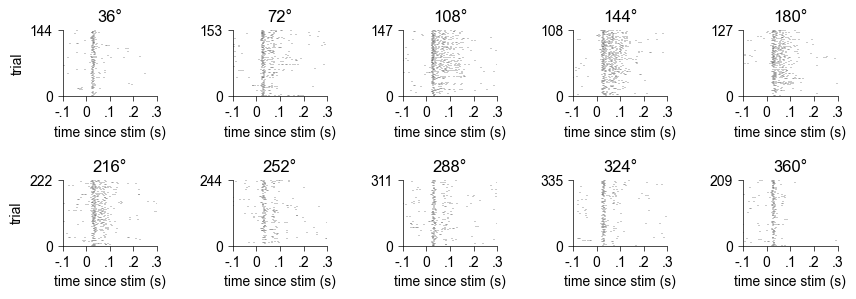

In [734]:
cell = 54
stim = 3
phase_analysis.plot_phase_binned_rasters(trial_type_raster_array_contra, bin_indices_all_contra, cell, stim, axis_width = .4964)
plt.savefig(r'Z:\robin\Paper\phase_coding_manuscript\figures\fig1\fig2_final\drafts\example_raster_contra.pdf', bbox_inches = 'tight')

In [729]:
bin_indices_all_ipsi, bins = phase_analysis.get_bin_indices(trial_type_indices_ipsi, expt_metadata_ipsi, frame_on_time_s_ipsi, hilbert_transformed_resp_array,  bin_width = 36)

meta NOT subset; don't know how to subset; dropped


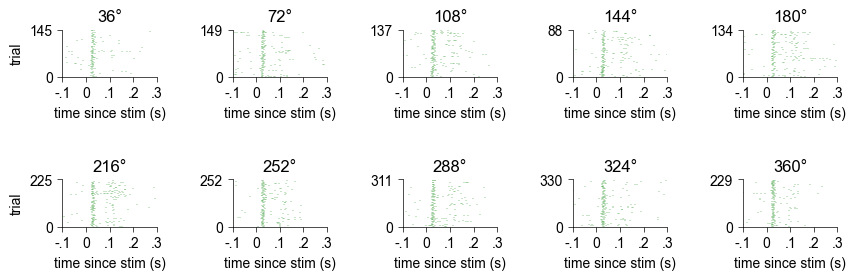

In [732]:
cell = 54
stim = 3
phase_analysis.plot_phase_binned_rasters(trial_type_raster_array_ipsi, bin_indices_all_ipsi, cell, stim, axis_width = .4964, color = 'g')
plt.savefig(r'Z:\robin\Paper\phase_coding_manuscript\figures\fig1\fig2_final\drafts\example_raster_ipsi.pdf', bbox_inches = 'tight')

In [ ]:
raster_array_path  = r'Z:\robin\Paper\phase_coding_manuscript\data\fig2\raster_data\ipsi\230421.npy'
trial_type_raster_array_ipsi = np.load(raster_array_path, allow_pickle = True)

In [ ]:
frame_on_time_s = phase_analysis.get_frame_on_time_s(mtrigger_array)
frame_on_time_s = frame_on_time_s[int(len(frame_on_time_s)/2):]

In [ ]:
bin_indices_all, bins = phase_analysis.get_bin_indices(trial_type_indices, expt_metadata, frame_on_time_s, hilbert_transformed_resp_array,  bin_width = 36)

meta NOT subset; don't know how to subset; dropped


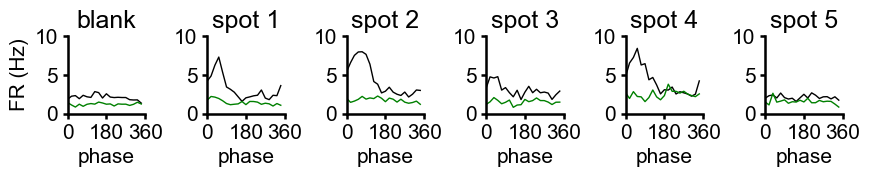

In [792]:
#107
cell = 148
plot_contra_ipsi_spot_tuning_curves(all_phase_tuning_concat_contra, all_phase_tuning_concat_ipsi, cell, ylim =10)
plt.savefig(r'Z:\robin\Paper\phase_coding_manuscript\figures\fig1\fig2_final\drafts\example_tuning_cell148.pdf', bbox_inches = 'tight')

meta NOT subset; don't know how to subset; dropped


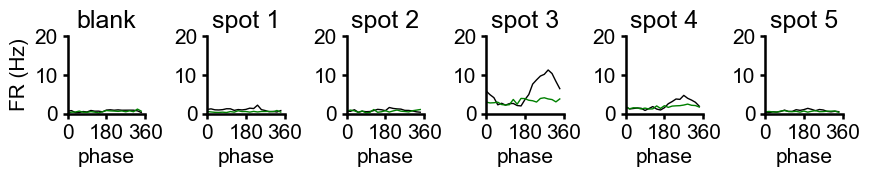

In [859]:
#107
cell = 360
plot_contra_ipsi_spot_tuning_curves(all_phase_tuning_concat_contra, all_phase_tuning_concat_ipsi, cell, ylim =20)
plt.savefig(r'Z:\robin\Paper\phase_coding_manuscript\figures\fig1\fig2_final\drafts\example_tuning_cell360.pdf', bbox_inches = 'tight')

In [735]:
# calculate the phase tuning index for contra responses
ori_idx_contra = np.empty((all_phase_tuning_concat_contra.shape[0], all_phase_tuning_concat_contra.shape[2]))
for cell in range(all_phase_tuning_concat_contra.shape[2]):
    for stim in range(all_phase_tuning_concat_contra.shape[0]):
        ori_idx_contra[stim,cell] = (np.max(all_phase_tuning_concat_contra[stim,:,cell])-np.min(all_phase_tuning_concat_contra[stim,:,cell]))/(np.max(all_phase_tuning_concat_contra[stim,:,cell]))

In [736]:
# calculate the phase tuning index for ipsi responses
ori_idx_ipsi = np.empty((all_phase_tuning_concat_ipsi.shape[0], all_phase_tuning_concat_ipsi.shape[2]))
for cell in range(all_phase_tuning_concat_ipsi.shape[2]):
    for stim in range(all_phase_tuning_concat_ipsi.shape[0]):
        ori_idx_ipsi[stim,cell] = (np.max(all_phase_tuning_concat_ipsi[stim,:,cell])-np.min(all_phase_tuning_concat_ipsi[stim,:,cell]))/(np.max(all_phase_tuning_concat_ipsi[stim,:,cell]))

In [737]:
# get the phase tuning index only for significantly activated cell-spot pairs 
# also get the phase tuning index for responses to the blank stimulus 
# calculate the difference between the tuning index for each significantly activated cell-spot pair and the blank 
stimulation_phase_preference_contra = concat_dict_contra['stimulation_phase_preference']
ori_idx_all_responsive_contra = []
ori_idx_all_diff_contra = []
for cell in range(all_phase_tuning_concat_contra.shape[2]):
    ori_idx_resp = ori_idx_contra[np.where(~np.isnan(stimulation_phase_preference_contra[:,cell]))[0],cell]
    ori_idx_blank = ori_idx_contra[0,cell]
    if len(ori_idx_resp)>0:
        ori_idx_all_responsive_contra.append(list(ori_idx_resp))
        ori_idx_all_diff_contra.append(ori_idx_resp - ori_idx_blank)
ori_idx_all_responsive_PCx_contra  = [cell for cells in ori_idx_all_responsive_contra for cell in cells]
ori_idx_all_responsive_diff_contra  = [cell for cells in ori_idx_all_diff_contra for cell in cells]

In [738]:
# get the phase tuning index only for significantly activated cell-spot pairs 
# also get the phase tuning index for responses to the blank stimulus 
# calculate the difference between the tuning index for each significantly activated cell-spot pair and the blank 
stimulation_phase_preference_ipsi = concat_dict_ipsi['stimulation_phase_preference']
ori_idx_all_responsive_ipsi = []
ori_idx_all_diff_ipsi = []
for cell in range(all_phase_tuning_concat_ipsi.shape[2]):
    ori_idx_resp = ori_idx_ipsi[np.where(~np.isnan(stimulation_phase_preference_contra[:,cell]))[0],cell]
    ori_idx_blank = ori_idx_ipsi[0,cell]
    if len(ori_idx_resp)>0:
        ori_idx_all_responsive_ipsi.append(list(ori_idx_resp))
        ori_idx_all_diff_ipsi.append(ori_idx_resp - ori_idx_blank)
ori_idx_all_responsive_PCx_ipsi  = [cell for cells in ori_idx_all_responsive_ipsi for cell in cells]
ori_idx_all_responsive_diff_ipsi  = [cell for cells in ori_idx_all_diff_ipsi for cell in cells]

meta NOT subset; don't know how to subset; dropped


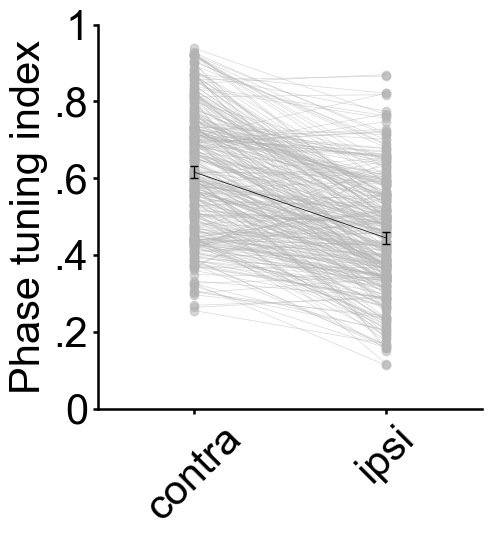

In [743]:
plt.plot([np.zeros(len(ori_idx_all_responsive_PCx_contra)),np.ones(len(ori_idx_all_responsive_PCx_contra))], [ori_idx_all_responsive_PCx_contra, ori_idx_all_responsive_PCx_ipsi], '-o', color = [.7,.7,.7], linewidth = .5, alpha = .5, zorder = 0);
CI_contra = np.mean(ori_idx_all_responsive_PCx_contra) -st.t.interval(alpha=0.95, df=len(ori_idx_all_responsive_PCx_contra)-1, loc=np.mean(ori_idx_all_responsive_PCx_contra), scale=st.sem(ori_idx_all_responsive_PCx_contra))[0]
CI_ipsi = np.mean(ori_idx_all_responsive_PCx_ipsi) - st.t.interval(alpha=0.95, df=len(ori_idx_all_responsive_PCx_ipsi)-1, loc=np.mean(ori_idx_all_responsive_PCx_ipsi), scale=st.sem(ori_idx_all_responsive_PCx_ipsi))[0] 
plt.errorbar([0,1], [np.mean(ori_idx_all_responsive_PCx_contra), np.mean(ori_idx_all_responsive_PCx_ipsi)], yerr = [CI_contra, CI_ipsi], fmt = '-', capsize = 3, elinewidth = 1, capthick = 1, linewidth = .5, color = 'k', zorder = 1)
plt.ylim(0,1)
plt.xlim(-.5,1.5)
plt.ylabel('Phase tuning index')
plt.xticks([0,1], labels = ['contra', 'ipsi'], rotation = 45)
plt.yticks(np.arange(0,1.2,.2), ['0','.2','.4','.6','.8','1'])
PGanalysis.axis_fixer(ratio=1, size = 30)
plt.savefig(r'Z:\robin\Paper\phase_coding_manuscript\figures\fig1\fig2_final\drafts\phase_tuning_index.pdf', bbox_inches = 'tight')